<a href="https://colab.research.google.com/github/younghoonNa/PythonDT2/blob/main/Day3_Notepad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Encoding
# 1. One-hot encoding (dummy)
import pandas as pd

df = pd.DataFrame({
    '숫자형 범주': [0, 2, 2, 1],
    '문자형 범주': ['Setosa', 'Virginica', 'Virginica', 'Versicolor']
})
df

,숫자형 범주,문자형 범주
0,0,Setosa
1,2,Virginica
2,2,Virginica
3,1,Versicolor


In [ ]:
# pd.get_dummies(df)
pd.get_dummies(df)

,숫자형 범주,문자형 범주_Setosa,문자형 범주_Versicolor,문자형 범주_Virginica
0,0,1,0,0
1,2,0,0,1
2,2,0,0,1
3,1,0,1,0


In [ ]:
# 열 선택 가능
pd.get_dummies(df, columns=['숫자형 범주', '문자형 범주'])

,숫자형 범주_0,숫자형 범주_1,숫자형 범주_2,문자형 범주_Setosa,문자형 범주_Versicolor,문자형 범주_Virginica
0,1,0,0,1,0,0
1,0,0,1,0,0,1
2,0,0,1,0,0,1
3,0,1,0,0,1,0


In [ ]:
# 2. sklearn OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(df)
encoder.categories_

[array([0, 1, 2]), array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)]

In [ ]:
encoder.transform(df).toarray()

array([[1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.]])

In [ ]:
pd.DataFrame(encoder.transform(df).toarray(),
             columns=encoder.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_0,x0_1,x0_2,x1_Setosa,x1_Versicolor,x1_Virginica
0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df

,숫자형 범주,문자형 범주
0,0,Setosa
1,2,Virginica
2,2,Virginica
3,1,Versicolor


In [ ]:
# Integer Encoding
# 1. Label Encoder
# 1차원 array or Series 변환
# 클래스 오름차순 정렬 후 변환
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder().fit(df['문자형 범주'])
encoder.classes_

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:
encoder.transform(df['문자형 범주'])

array([0, 2, 2, 1])

In [ ]:
df['LE 결과'] = encoder.transform(df['문자형 범주'])
df

,숫자형 범주,문자형 범주,LE 결과
0,0,Setosa,0
1,2,Virginica,2
2,2,Virginica,2
3,1,Versicolor,1


In [ ]:
encoder.inverse_transform(df['LE 결과'])

array(['Setosa', 'Virginica', 'Virginica', 'Versicolor'], dtype=object)

In [ ]:
df[['문자형 범주']]

,문자형 범주
0,Setosa
1,Virginica
2,Virginica
3,Versicolor


In [ ]:
# 2. Ordinal Encoder
# 2차원 array or DataFrame 변환
# 클래스 순서 변경 가능
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Versicolor', 'Virginica', 'Setosa']])
encoder.fit(df[['문자형 범주']])
df['OE'] = encoder.transform(df[['문자형 범주']]).reshape(-1)
df

,숫자형 범주,문자형 범주,LE 결과,OE
0,0,Setosa,0,2.0
1,2,Virginica,2,1.0
2,2,Virginica,2,1.0
3,1,Versicolor,1,0.0


In [ ]:
# 직접 변환
# apply + dict 함수 이용
mdict = {'Versicolor': 0, 'Virginica':1,  'Setosa':2}

df['OE_own'] = df['문자형 범주'].apply(lambda x: mdict[x])
df

,숫자형 범주,문자형 범주,LE 결과,OE,OE_own
0,0,Setosa,0,2.0,2
1,2,Virginica,2,1.0,1
2,2,Virginica,2,1.0,1
3,1,Versicolor,1,0.0,0


In [ ]:
# 로그, 지수 변환
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston  = load_boston()
x_train, x_test, y_train ,y_test = train_test_split(boston.data, boston.target, random_state=1234)

In [ ]:
# OLS
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train ,y_train), model.score(x_test, y_test)

(0.7301842893511348, 0.7325732922440746)

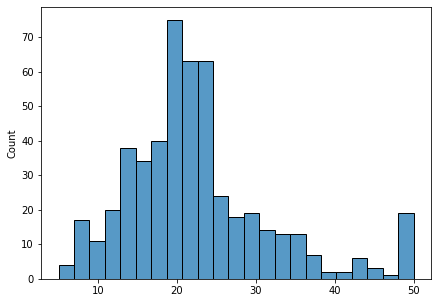

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(boston.target)

In [ ]:
Y = np.log1p(boston.target)

x_train, x_test, y_train ,y_test = train_test_split(boston.data, Y, random_state=1234)

In [ ]:
# OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)
r2_score(np.expm1(y_train), np.expm1(model.predict(x_train))), r2_score(np.expm1(y_test), np.expm1(model.predict(x_test)))

(0.7653462354551274, 0.7421015865875388)

In [ ]:
model.predict(x_test[:1]), np.expm1(model.predict(x_test[:1]))

(array([3.085265]), array([20.87326259]))

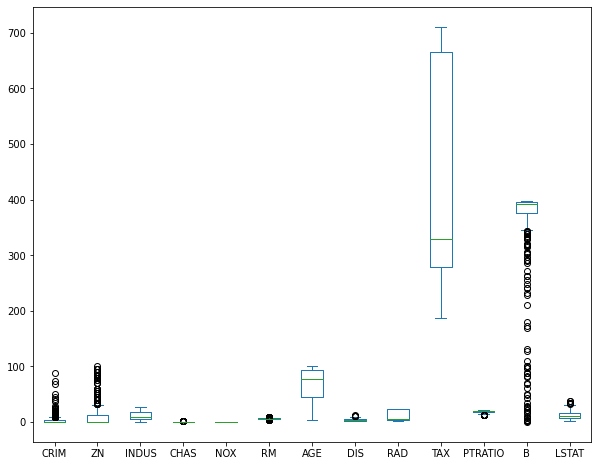

In [ ]:
# scaling
pd.DataFrame(boston.data, columns=boston.feature_names).plot.box(figsize=(10, 8))

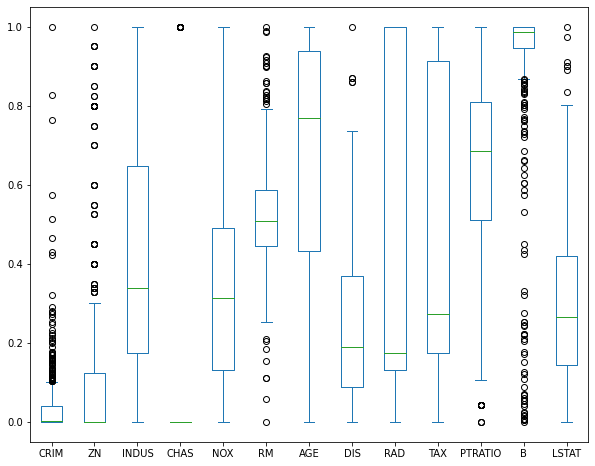

In [ ]:
# 1. 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(boston.data)
pd.DataFrame(x_scaled, columns=boston.feature_names).plot.box(figsize=(10, 8))

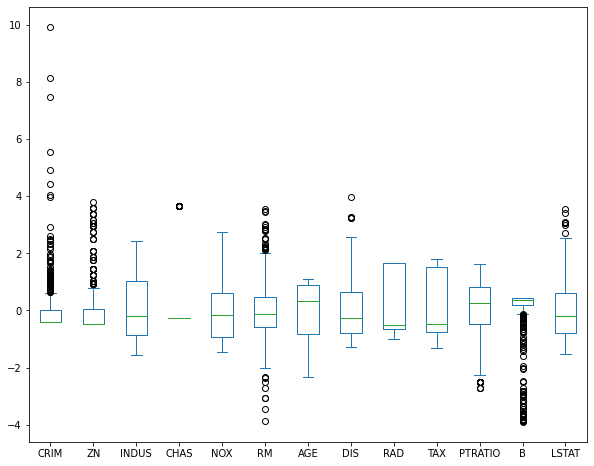

In [ ]:
# 2. 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(boston.data)
pd.DataFrame(x_scaled, columns=boston.feature_names).plot.box(figsize=(10, 8))

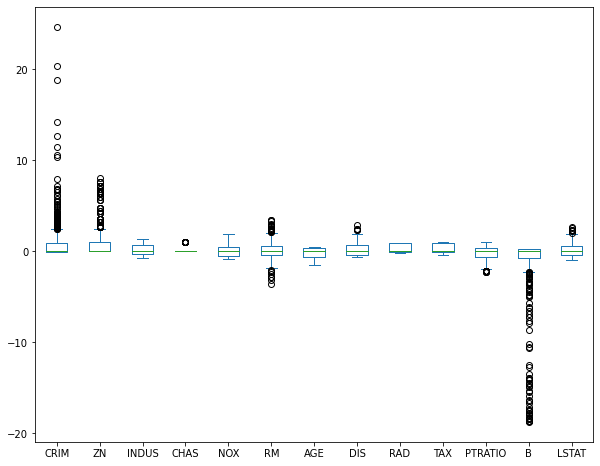

In [ ]:
# 3. Robust Scaling
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_scaled = scaler.fit_transform(boston.data)
pd.DataFrame(x_scaled, columns=boston.feature_names).plot.box(figsize=(10, 8))

In [ ]:
# Variance Threshold
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0.15)
pd.DataFrame(vt.fit_transform(boston.data), columns=boston.feature_names[vt.get_support()])

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
vt.get_support()

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
# KBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

sel = SelectKBest(f_regression, k=10)
sel.fit_transform(boston.data, boston.target)

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 2.9600e+02, 1.5300e+01,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 2.4200e+02, 1.7800e+01,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 2.4200e+02, 1.7800e+01,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        7.8800e+00]])

In [ ]:
# RFE
from sklearn.feature_selection import RFE

rfe = RFE(estimator=model, n_features_to_select=5, step=3)
rfe.fit(x_train, y_train)
rfe.n_features_, rfe.support_, rfe.ranking_

(5, array([False, False, False,  True,  True,  True, False,  True, False,
        False,  True, False, False]), array([2, 3, 3, 1, 1, 1, 4, 1, 3, 4, 1, 4, 2]))

In [ ]:
# PCA
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
df[['RAD', 'TAX']].corr()

,RAD,TAX
RAD,1.000000,0.910228
TAX,0.910228,1.000000


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
df['rad-tax-pca']= pca.fit_transform(df[['RAD', 'TAX']])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,rad-tax-pca
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,-112.514926
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,-166.408267
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,-166.408267
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,-186.339174
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,-186.339174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,-135.489514
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,-135.489514
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,-135.489514
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,-135.489514


In [ ]:
from seaborn.axisgrid import Grid
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

params={
    'n_estimators': [100, 200, 300], 
    'max_samples': [1, 0.9, 0.8]
}

model = GridSearchCV(RandomForestRegressor(), params, cv=5)
model.fit(boston.data ,boston.target)
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.422953,0.180993,0.038225,0.026309,1,100,"{'max_samples': 1, 'n_estimators': 100}",-1.135639e-07,-0.081375,-1.012061,-0.082829,-2.757145,-0.786682,1.053115,9
1,0.447081,0.035952,0.033934,0.007285,1,200,"{'max_samples': 1, 'n_estimators': 200}",-6.104633e-02,-0.101969,-0.988591,-0.145376,-2.600674,-0.779531,0.973420,8
2,0.640169,0.039292,0.044099,0.004076,1,300,"{'max_samples': 1, 'n_estimators': 300}",-2.429672e-02,-0.077282,-1.096099,-0.221564,-1.985637,-0.680976,0.759105,7
3,0.281514,0.004149,0.011043,0.001824,0.9,100,"{'max_samples': 0.9, 'n_estimators': 100}",7.790034e-01,0.873172,0.733081,0.457391,0.226551,0.613840,0.238000,6
4,0.568895,0.012935,0.019460,0.001220,0.9,200,"{'max_samples': 0.9, 'n_estimators': 200}",7.775306e-01,0.865504,0.711211,0.466339,0.326098,0.629336,0.201475,5
5,0.855141,0.013629,0.026577,0.000520,0.9,300,"{'max_samples': 0.9, 'n_estimators': 300}",7.648455e-01,0.860484,0.749308,0.475486,0.320294,0.634083,0.202608,4
6,0.274893,0.005699,0.009984,0.000378,0.8,100,"{'max_samples': 0.8, 'n_estimators': 100}",7.652202e-01,0.860584,0.724182,0.444138,0.381000,0.635025,0.188012,3
7,0.536954,0.014907,0.018666,0.000468,0.8,200,"{'max_samples': 0.8, 'n_estimators': 200}",7.729319e-01,0.862586,0.753914,0.473019,0.399769,0.652444,0.181665,1
8,0.799112,0.016660,0.029815,0.002846,0.8,300,"{'max_samples': 0.8, 'n_estimators': 300}",7.737634e-01,0.862374,0.745627,0.472638,0.377504,0.646381,0.187196,2


In [ ]:
# r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor()
model.fit(x_train ,y_train)
model.score(x_train ,y_train), model.score(x_test, y_test)
r2_score(y_train, model.predict(x_train)), r2_score(y_test, model.predict(x_test))

(0.979574293530633, 0.8675808842839403)

In [ ]:
x_test.shape

(127, 13)

In [ ]:
# adjusted r2
r2 = r2_score(y_test, model.predict(x_test))

ad_r2 = 1 - ((1-r2)*(x_test.shape[0]-1)) / (x_test.shape[0]- x_test.shape[1] - 1)
ad_r2

0.8523468267236857

In [ ]:
# mae
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train, model.predict(x_train)), mean_absolute_error(y_test, model.predict(x_test))

(0.03800164109137663, 0.10419516749842163)

In [ ]:
# mape
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_train, model.predict(x_train)), mean_absolute_percentage_error(y_test, model.predict(x_test))

(0.01278388923982184, 0.03698484012911437)

In [ ]:
# mse
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, model.predict(x_train)), mean_squared_error(y_test, model.predict(x_test))

(0.0027962574114524844, 0.024744343252141084)

In [ ]:
# rmse
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, model.predict(x_train), squared=False), mean_squared_error(y_test, model.predict(x_test), squared=False)

(0.052879650258416844, 0.15730334787327663)

In [ ]:
# rmsle
from sklearn.metrics import mean_squared_log_error

mean_squared_log_error(y_train, model.predict(x_train), squared=False), mean_squared_log_error(y_test, model.predict(x_test), squared=False)

(0.013477645546943626, 0.04206314126366823)